<a href="https://colab.research.google.com/github/NerusuSahithi011/NLP/blob/main/lab_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ASSIGNMENT 5.3

In [1]:
#Import Required Libraries
import pandas as pd
import spacy
from spacy.matcher import Matcher
from collections import Counter
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [2]:
#Download Required NLTK Resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
df = pd.read_csv(
    '/content/arxiv_data.csv.zip',
    engine='python',
    nrows=1000
)

print(df.head())

                                              titles  \
0  Survey on Semantic Stereo Matching / Semantic ...   
1  FUTURE-AI: Guiding Principles and Consensus Re...   
2  Enforcing Mutual Consistency of Hard Regions f...   
3  Parameter Decoupling Strategy for Semi-supervi...   
4  Background-Foreground Segmentation for Interio...   

                                           summaries  \
0  Stereo matching is one of the widely used tech...   
1  The recent advancements in artificial intellig...   
2  In this paper, we proposed a novel mutual cons...   
3  Consistency training has proven to be an advan...   
4  To ensure safety in automated driving, the cor...   

                         terms  
0           ['cs.CV', 'cs.LG']  
1  ['cs.CV', 'cs.AI', 'cs.LG']  
2           ['cs.CV', 'cs.AI']  
3                    ['cs.CV']  
4           ['cs.CV', 'cs.LG']  


In [22]:
#Word Tokenization (NLTK)
nltk.download("punkt_tab")
df["tokenized_summaries"] = df["summaries"].apply(word_tokenize)
df["tokenized_summaries"].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokenized_summaries
0,"[Stereo, matching, is, one, of, the, widely, u..."
1,"[The, recent, advancements, in, artificial, in..."
2,"[In, this, paper, ,, we, proposed, a, novel, m..."
3,"[Consistency, training, has, proven, to, be, a..."
4,"[To, ensure, safety, in, automated, driving, ,..."


In [23]:
#Word Tokenization (NLTK)
df["tokenized_summaries"] = df["summaries"].apply(word_tokenize)
df["tokenized_summaries"].head()



,tokenized_summaries
0,"[Stereo, matching, is, one, of, the, widely, u..."
1,"[The, recent, advancements, in, artificial, in..."
2,"[In, this, paper, ,, we, proposed, a, novel, m..."
3,"[Consistency, training, has, proven, to, be, a..."
4,"[To, ensure, safety, in, automated, driving, ,..."


In [24]:
#Stopword Removal (NLTK)
stop_words = set(stopwords.words("english"))

df["filtered_summaries"] = df["tokenized_summaries"].apply(
    lambda words: [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]
)

df["filtered_summaries"].head()



,filtered_summaries
0,"[stereo, matching, one, widely, used, techniqu..."
1,"[recent, advancements, artificial, intelligenc..."
2,"[paper, proposed, novel, mutual, consistency, ..."
3,"[consistency, training, proven, advanced, fram..."
4,"[ensure, safety, automated, driving, correct, ..."


In [25]:
#Lemmatization (NLTK)
lemmatizer = WordNetLemmatizer()

df["lemmatized_summaries"] = df["filtered_summaries"].apply(
    lambda words: [lemmatizer.lemmatize(w) for w in words]
)

df["lemmatized_summaries"].head()


,lemmatized_summaries
0,"[stereo, matching, one, widely, used, techniqu..."
1,"[recent, advancement, artificial, intelligence..."
2,"[paper, proposed, novel, mutual, consistency, ..."
3,"[consistency, training, proven, advanced, fram..."
4,"[ensure, safety, automated, driving, correct, ..."


In [26]:
#Rejoin Words
df["clean_summaries"] = df["lemmatized_summaries"].apply(
    lambda words: " ".join(words)
)

df["clean_summaries"].head()



,clean_summaries
0,stereo matching one widely used technique infe...
1,recent advancement artificial intelligence ai ...
2,paper proposed novel mutual consistency networ...
3,consistency training proven advanced framework...
4,ensure safety automated driving correct percep...


In [27]:
#Load spaCy Model
nlp = spacy.load("en_core_web_sm")


In [28]:
#Process Text Using spaCy Pipeline
docs = list(nlp.pipe(df["clean_summaries"].tolist()))



In [29]:
#Extract Noun Phrases
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

np_freq = Counter(noun_phrases).most_common(10)
np_freq



[('method', 83),
 ('algorithm', 72),
 ('image', 60),
 ('image segmentation', 57),
 ('paper', 54),
 ('deep learning', 50),
 ('performance', 44),
 ('approach', 40),
 ('us', 39),
 ('segmentation', 36)]

In [30]:
#Named Entity Recognition (NER)
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append(ent.label_)

entity_freq = Counter(entities)
entity_freq


Counter({'CARDINAL': 819,
         'DATE': 89,
         'NORP': 45,
         'ORDINAL': 318,
         'ORG': 306,
         'PERSON': 158,
         'PRODUCT': 3,
         'GPE': 45,
         'QUANTITY': 3,
         'TIME': 19,
         'PERCENT': 2,
         'LOC': 3})

In [31]:
#Rule-Based Matching (spaCy Matcher)
matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN", "OP": "+"}
]

matcher.add("TECHNICAL_TERMS", [pattern])

technical_terms = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        technical_terms.append(doc[start:end].text.lower())

technical_terms[:10]


['technique',
 'depth',
 'depth stereo',
 'stereo',
 'depth stereo image',
 'stereo image',
 'image',
 'robustness speed',
 'speed',
 'major topic']

In [33]:
#POS Tagging
pos_data = []

for doc in docs:
    for token in doc:
        pos_data.append({
            "Word": token.text,
            "POS_Tag": token.pos_
        })

pos_df = pd.DataFrame(pos_data)
pos_df.head(20)



,Word,POS_Tag
0,stereo,PROPN
1,matching,VERB
2,one,NUM
3,widely,ADV
4,used,VERB
5,technique,NOUN
6,inferring,VERB
7,depth,NOUN
8,stereo,NOUN
9,image,NOUN


In [34]:
#POS Tag Frequency
pos_counts = pos_df["POS_Tag"].value_counts()
pos_counts


,count
POS_Tag,
NOUN,54393
ADJ,20152
VERB,19402
ADV,5224
PROPN,4381
NUM,912
ADP,854
AUX,323
SCONJ,264


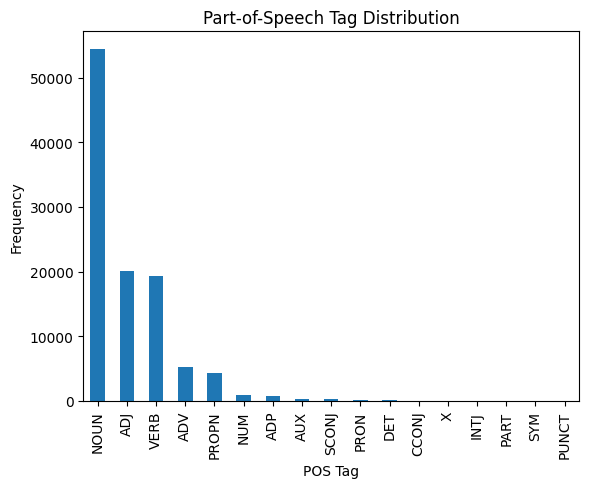

In [35]:
#POS Tag Visualization
import matplotlib.pyplot as plt

pos_counts.plot(kind="bar")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.title("Part-of-Speech Tag Distribution")
plt.show()



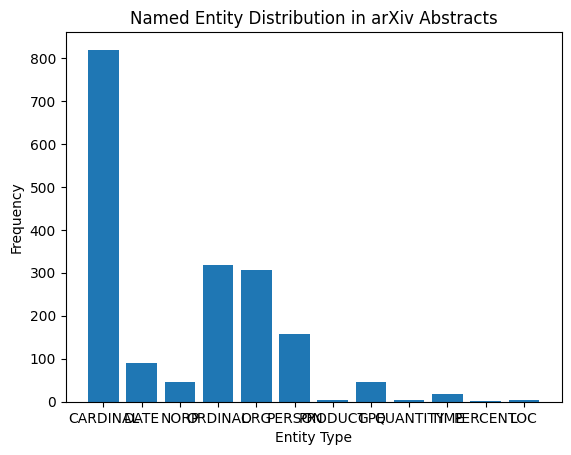

In [32]:
#Visualization
labels = list(entity_freq.keys())
counts = list(entity_freq.values())

plt.bar(labels, counts)
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Named Entity Distribution in arXiv Abstracts")
plt.show()




In [48]:
#merging
df = pd.read_csv(
    '/content/arxiv_data.csv.zip',
    engine='python',
    nrows=1000
)[["summaries"]].dropna()
df = df.reset_index(drop=True)
df["doc_id"] = df.index


# ---------- FUNCTIONS ----------
def tokenize(df):
    return pd.DataFrame({
        "doc_id": df["doc_id"],
        "tokenized": df["summaries"].apply(word_tokenize)
    })

def remove_stopwords(token_df):
    sw = set(stopwords.words("english"))
    return pd.DataFrame({
        "doc_id": token_df["doc_id"],
        "filtered": token_df["tokenized"].apply(
            lambda w: [i.lower() for i in w if i.isalpha() and i.lower() not in sw]
        )
    })

def lemmatize(filtered_df):
    lem = WordNetLemmatizer()
    return pd.DataFrame({
        "doc_id": filtered_df["doc_id"],
        "lemmatized": filtered_df["filtered"].apply(
            lambda w: [lem.lemmatize(i) for i in w]
        )
    })

def rejoin(lemma_df):
    return pd.DataFrame({
        "doc_id": lemma_df["doc_id"],
        "clean_summaries": lemma_df["lemmatized"].apply(lambda w: " ".join(w))
    })

def pos_tag(clean_df):
    rows = []
    for i, text in zip(clean_df["doc_id"], clean_df["clean_summaries"]):
        doc = nlp(text)
        rows.append({
            "doc_id": i,
            "pos_tags": [(t.text, t.pos_) for t in doc]
        })
    return pd.DataFrame(rows)


# ---------- APPLY + MERGE ----------
merged_df = (
    df
    .merge(tokenize(df), on="doc_id")
    .merge(remove_stopwords(tokenize(df)), on="doc_id")
    .merge(lemmatize(remove_stopwords(tokenize(df))), on="doc_id")
    .merge(rejoin(lemmatize(remove_stopwords(tokenize(df)))), on="doc_id")
    .merge(pos_tag(rejoin(lemmatize(remove_stopwords(tokenize(df))))), on="doc_id")
)

merged_df.head()

,summaries,doc_id,tokenized,filtered,lemmatized,clean_summaries,pos_tags
0,Stereo matching is one of the widely used tech...,0,"[Stereo, matching, is, one, of, the, widely, u...","[stereo, matching, one, widely, used, techniqu...","[stereo, matching, one, widely, used, techniqu...",stereo matching one widely used technique infe...,"[(stereo, PROPN), (matching, VERB), (one, NUM)..."
1,The recent advancements in artificial intellig...,1,"[The, recent, advancements, in, artificial, in...","[recent, advancements, artificial, intelligenc...","[recent, advancement, artificial, intelligence...",recent advancement artificial intelligence ai ...,"[(recent, ADJ), (advancement, NOUN), (artifici..."
2,"In this paper, we proposed a novel mutual cons...",2,"[In, this, paper, ,, we, proposed, a, novel, m...","[paper, proposed, novel, mutual, consistency, ...","[paper, proposed, novel, mutual, consistency, ...",paper proposed novel mutual consistency networ...,"[(paper, NOUN), (proposed, VERB), (novel, ADJ)..."
3,Consistency training has proven to be an advan...,3,"[Consistency, training, has, proven, to, be, a...","[consistency, training, proven, advanced, fram...","[consistency, training, proven, advanced, fram...",consistency training proven advanced framework...,"[(consistency, NOUN), (training, NOUN), (prove..."
4,"To ensure safety in automated driving, the cor...",4,"[To, ensure, safety, in, automated, driving, ,...","[ensure, safety, automated, driving, correct, ...","[ensure, safety, automated, driving, correct, ...",ensure safety automated driving correct percep...,"[(ensure, VERB), (safety, NOUN), (automated, V..."


In [45]:
#by the pipeline method using functions
# =============== ALL OPERATIONS BY CALLING ONE FUNCTION ===============

import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Load spaCy
nlp = spacy.load("en_core_web_sm")


def full_text_pipeline(filepath='/content/arxiv_data.csv.zip', rows=1000):
    # Load data
    df = pd.read_csv(filepath, engine='python', nrows=rows)[["summaries"]].dropna()
    df = df.reset_index(drop=True)
    df["doc_id"] = df.index

    # Tokenization
    token_df = pd.DataFrame({
        "doc_id": df["doc_id"],
        "tokenized": df["summaries"].apply(word_tokenize)
    })

    # Stopword removal
    sw = set(stopwords.words("english"))
    stop_df = pd.DataFrame({
        "doc_id": token_df["doc_id"],
        "filtered": token_df["tokenized"].apply(
            lambda w: [i.lower() for i in w if i.isalpha() and i.lower() not in sw]
        )
    })

    # Lemmatization
    lem = WordNetLemmatizer()
    lemma_df = pd.DataFrame({
        "doc_id": stop_df["doc_id"],
        "lemmatized": stop_df["filtered"].apply(
            lambda w: [lem.lemmatize(i) for i in w]
        )
    })

    # Rejoin
    clean_df = pd.DataFrame({
        "doc_id": lemma_df["doc_id"],
        "clean_summaries": lemma_df["lemmatized"].apply(lambda w: " ".join(w))
    })

    # POS tagging (spaCy)
    pos_df = pd.DataFrame({
        "doc_id": clean_df["doc_id"],
        "pos_tags": clean_df["clean_summaries"].apply(
            lambda text: [(t.text, t.pos_) for t in nlp(text)]
        )
    })

    # Merge all
    final_df = (
        df
        .merge(token_df, on="doc_id")
        .merge(stop_df, on="doc_id")
        .merge(lemma_df, on="doc_id")
        .merge(clean_df, on="doc_id")
        .merge(pos_df, on="doc_id")
    )

    return final_df


# -------- FUNCTION CALL --------
result_df = full_text_pipeline(filepath='/content/arxiv_data.csv.zip')
result_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,summaries,doc_id,tokenized,filtered,lemmatized,clean_summaries,pos_tags
0,Stereo matching is one of the widely used tech...,0,"[Stereo, matching, is, one, of, the, widely, u...","[stereo, matching, one, widely, used, techniqu...","[stereo, matching, one, widely, used, techniqu...",stereo matching one widely used technique infe...,"[(stereo, PROPN), (matching, VERB), (one, NUM)..."
1,The recent advancements in artificial intellig...,1,"[The, recent, advancements, in, artificial, in...","[recent, advancements, artificial, intelligenc...","[recent, advancement, artificial, intelligence...",recent advancement artificial intelligence ai ...,"[(recent, ADJ), (advancement, NOUN), (artifici..."
2,"In this paper, we proposed a novel mutual cons...",2,"[In, this, paper, ,, we, proposed, a, novel, m...","[paper, proposed, novel, mutual, consistency, ...","[paper, proposed, novel, mutual, consistency, ...",paper proposed novel mutual consistency networ...,"[(paper, NOUN), (proposed, VERB), (novel, ADJ)..."
3,Consistency training has proven to be an advan...,3,"[Consistency, training, has, proven, to, be, a...","[consistency, training, proven, advanced, fram...","[consistency, training, proven, advanced, fram...",consistency training proven advanced framework...,"[(consistency, NOUN), (training, NOUN), (prove..."
4,"To ensure safety in automated driving, the cor...",4,"[To, ensure, safety, in, automated, driving, ,...","[ensure, safety, automated, driving, correct, ...","[ensure, safety, automated, driving, correct, ...",ensure safety automated driving correct percep...,"[(ensure, VERB), (safety, NOUN), (automated, V..."
